# Lab session 1 & 2: Introduction to PyTorch and Automatic Differentiation

Authors: [pierre.tandeo@imt-atlantique.fr](pierre.tandeo@imt-atlantique.fr), [lucas.drumetz@imt-atlantique.fr](lucas.drumetz@imt-atlantique.fr), [simon.benaichouche@imt-atlantique.fr](simon.benaichouche@imt-atlantique.fr), [aurelien.colin@imt-atlantique.fr](aurelien.colin@imt-atlantique.fr)

Year: 2021-2022

The aim of this practice is to explain $y$ (output variable) as a function of one or several $x$ (input variables) using neural networks. Here, $x$ are continuous and $y$ can be continuous (*regression*) or discrete (*classification*). These 2 aspects are treated in the deep learning framework. Both linear and nonlinear cases will be covered in this lab session.

We use the PyTorch library to implement deep learning architectures. This interface has the following characteristics:
- it is using tensors, kind of arrays that can be easily manipulated by GPUs
- it is using the automatic differentiation to easily compute the gradient of complex functions
- it is one of the most important deep learning library
- it can interact with classical machine learning libraries like *Scikit-learn*

This lab session is an introduction. It gives you the general concepts of neural nets and helps you to implement them using a dedicated Python library. If you want to play with similar regression and classification examples in small dimensions, you can use http://playground.tensorflow.org/. For more details concerning the implementation of PyTorch, please visit this tutorial at https://pytorch.org/tutorials/.

In [8]:
# Import classic libraries (Matplotlib and PyLab)
%matplotlib inline
%pylab inline

# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Parameters (figure size and random seed)
pylab.rcParams['figure.figsize'] = (15,15)
torch.manual_seed(1)

Populating the interactive namespace from numpy and matplotlib


**Linear regression**

Simple regression is a linear problem between continuous variables $x$ and $y$. Here, we write the model $y=2+0.5x$ and generate $y$ using an additional Gaussian standard random noise.

Text(0, 0.5, 'y')

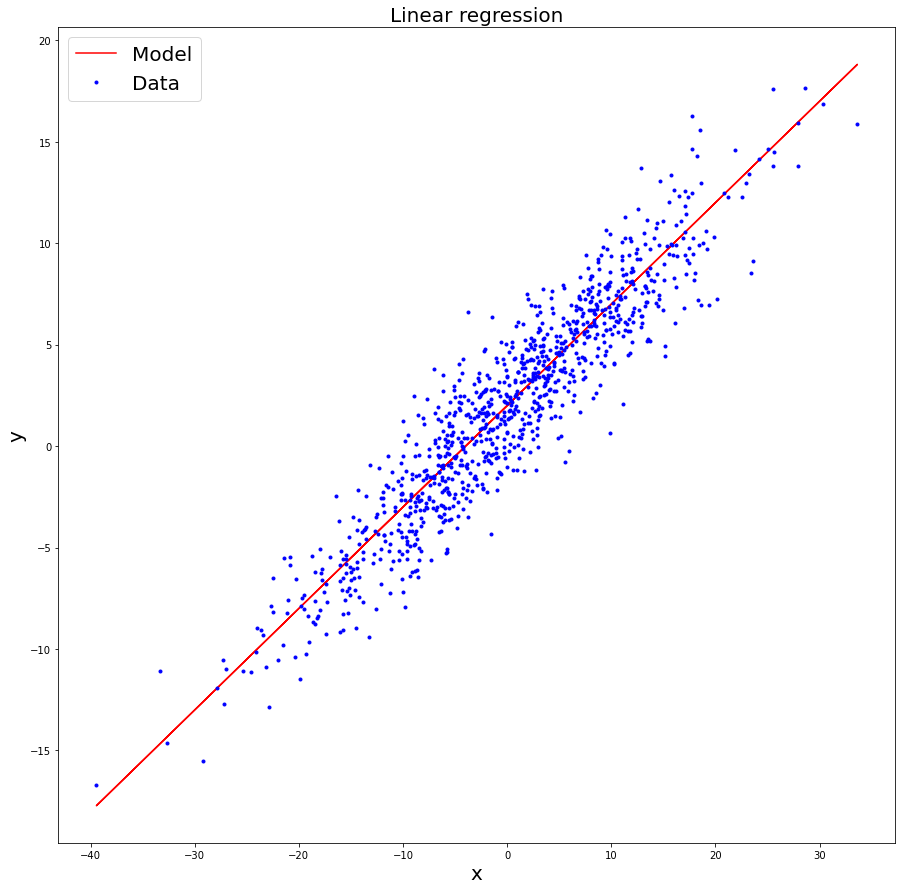

In [9]:
# Generate data
x = torch.randn(1000, 1)*10 # input variable
y_true = 2 + 0.5*x # true model
y = y_true + torch.randn(1000, 1)*2 # add noise to the truth

# Plot noisy data and true model
plot(x, y_true, 'r')
plot(x, y, 'b.')
legend(['Model', 'Data'], prop={'size': 20})
title('Linear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

The objective is to build a neural net to fit the relationship between $x$ and $y$. In PyTorch, it is necessary to create a specific class for each neural network architecture. Below, we declare the neural network corresponding to a linear regression.

In [10]:
# Declare a class for linear regression
class linear_regression_nn(nn.Module):
    
    # class initialization
    def __init__(self, input_size, output_size):
        super(linear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc = nn.Linear(input_size, output_size)
        
    # function to apply the neural network
    def forward(self, x):
        y_pred = self.fc(x)
        return y_pred

Then, we create a neural network based on the specific architecture declared above. We finally check the values of the parameters (randomly generated).

In [11]:
# Create the neural network (1 input size for x and 1 output size for y, bias is declared by default)
linear_regression_model = linear_regression_nn(1, 1)

# Print the model architecture
print(linear_regression_model)

# Print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print('Slope: ', slope)
print('Bias: ', bias)

linear_regression_nn(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
Slope:  Parameter containing:
tensor([[0.0292]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.5334], requires_grad=True)


<img src="https://tandeo.files.wordpress.com/2020/09/simple_regression_dl.png">

In order to quantify the quality of the fit given by the neural network, we define a loss function. For a regression problem, the classic loss function is the Mean Squared Error (MSE). But other loss functions are already defined in PyTorch: https://pytorch.org/docs/stable/nn.html#loss-functions.

Then, to compute the gradient of the loss function w.r.t. the parameters of the neural network, we use an optimization technique. A classic procedure is the Stochastic Gradient Descent (SQG). Other optimizers are coded in PyTorch: https://pytorch.org/docs/stable/optim.html#.

In [12]:
# Loss function: MSE = sum [(y - y_pred)^2], with y_pred = w0 + w1*x
criterion = nn.MSELoss()

# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(linear_regression_model.parameters(), lr = 0.001)

Now, we fit the neural network using the ($x$, $y$) dataset. At each iteration (epoch), the loss function is stored and the estimated regression line is plotted.

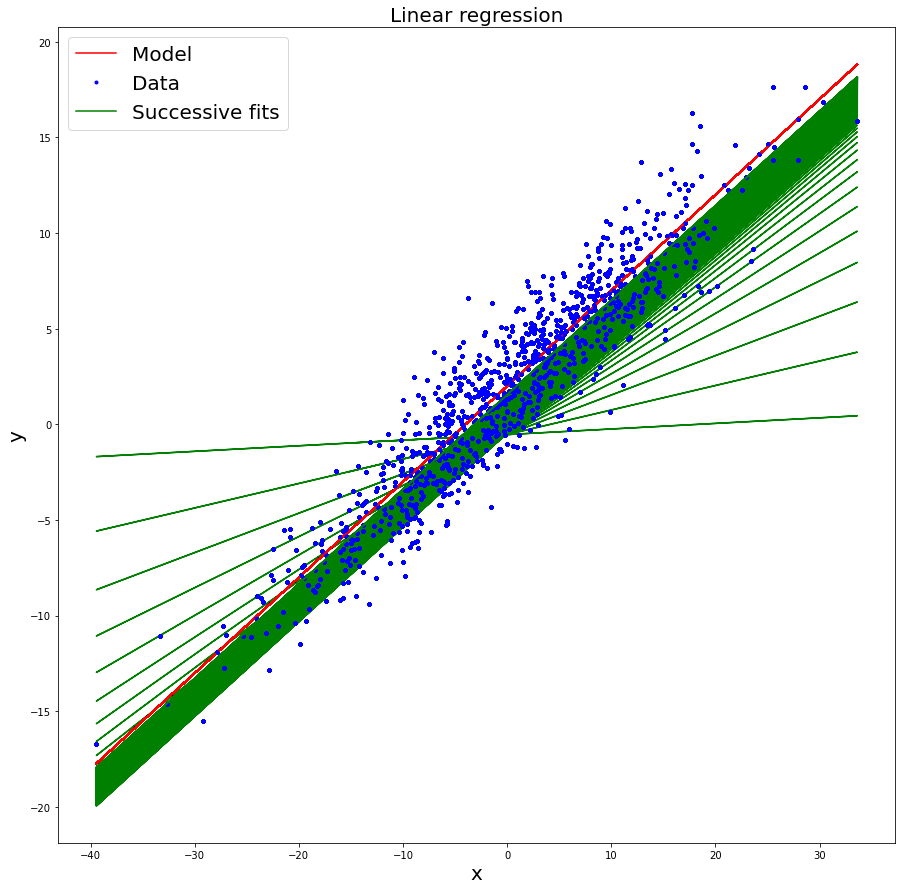

In [13]:
epochs = 1000 # number of epochs
losses = [] # list to stock the loss at each iteration

# Loop on epochs
for i in range(epochs):
    
    # compute the prediction using the previous parameters of the neural network
    y_pred = linear_regression_model.forward(x)
    
    # compute and stock the loss
    loss = criterion(y_pred, y)
    losses.append(loss)
    
    # initialize the gradient to zero
    optimizer.zero_grad()
    
    # compute the gradient by back propagation
    loss.backward()
    
    # update the parameter values using the gradient
    optimizer.step()
    
    # plot the adjustment at each epoch
    plot(x, y_true, 'r')
    plot(x, y, 'b.')
    plot(x, y_pred.detach().numpy(), 'g')
    legend(['Model', 'Data', 'Successive fits'], prop={'size': 20})
    title('Linear regression', size=20)
    xlabel('x', size=20)
    ylabel('y', size=20)

It is important to check that the loss function is decreasing. If not, it maybe means that the learning rate in the optimization procedure is too large.

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

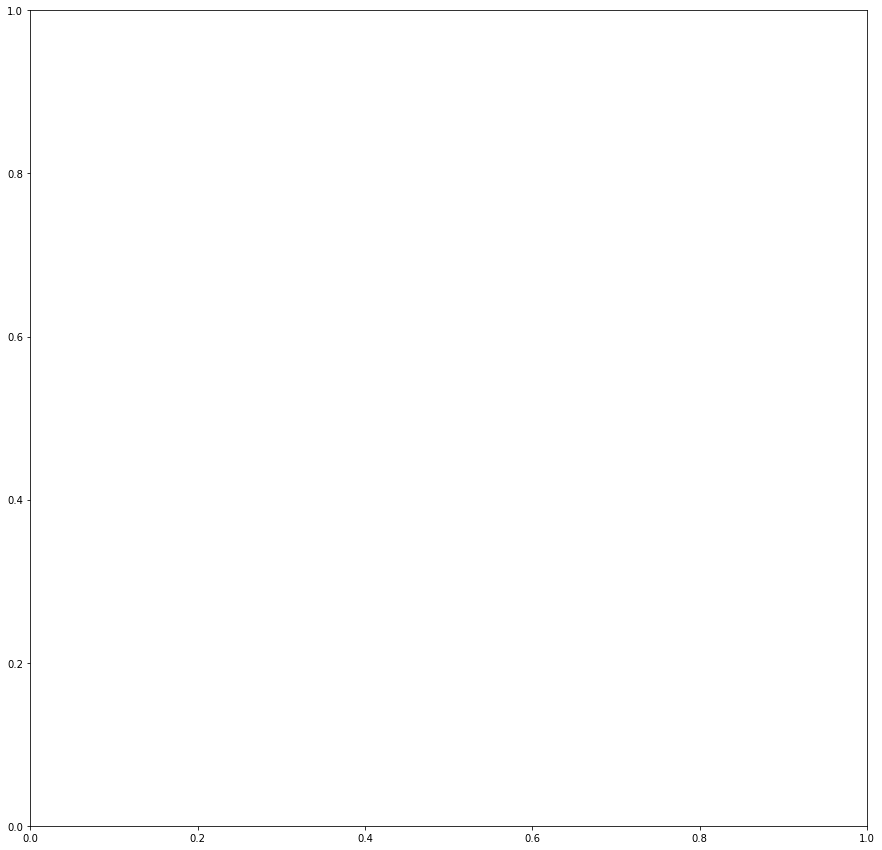

In [16]:
# Print the loss function
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

Finally, let's check if the estimated parameters (at the last epoch) are close to the true ones (i.e., $0.5$ for the slope and $2$ for the bias).

In [15]:
# Extract and print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print('Slope: ', slope)
print('Bias: ', bias)

Slope:  Parameter containing:
tensor([[0.4941]], requires_grad=True)
Bias:  Parameter containing:
tensor([1.5506], requires_grad=True)


**Nonlinear regression**

Now, we perform a multiple regression between continuous variables $x$ and $y$. Here, we write the nonlinear model $y=2+0.5x-0.05x^2$ and generate $y$ using an additional Gaussian standard random noise.

In [ ]:
# Generate data
x = torch.randn(1000, 1)*10 # input variable
y_true = 2 + 0.5*x - 0.05*x**2 # true model
y = y_true + torch.randn(1000, 1)*2 # add noise to the truth

# Plot noisy data and true model
plot(x, y_true, 'r.')
plot(x, y, 'b.')
legend(['Model', 'Data'], prop={'size': 20})
title('Nonlinear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

We declare the neural network corresponding to a nonlinear regression. The nonlinearities are introduced by a hidden layer with ReLu activations. Other activation functions are available in PyTorch: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity.

In [17]:
# Declare a class for nonlinear regression
class nonlinear_regression_nn(nn.Module):
    
    # class initialization
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc0 = nn.Linear(input_size, hidden_size)
        # ReLu activation
        self.relu = nn.ReLU()
        # fully connected layer with linear activation
        self.fc1 = nn.Linear(hidden_size, output_size)
        
    # function to apply the neural network
    def forward(self, x):
        out = self.fc0(x)
        out = self.relu(out)
        y_pred = self.fc1(out)
        return y_pred
    
# Create the neural network (1 input size for x, 6 neurons in the hidden layer, and 1 output size for y)
nonlinear_regression_model = nonlinear_regression_nn(1, 6, 1)

We then can check the structure of the network and see the parameter vales (randomly generated).

In [18]:
# Print the model parameters (weights of the neural network)
for name, param in nonlinear_regression_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc0.weight tensor([[ 0.8599],
        [ 0.2515],
        [-0.2158],
        [ 0.7018],
        [ 0.8198],
        [-0.8419]])
fc0.bias tensor([-0.8248, -0.6578, -0.8600, -0.3000,  0.3661, -0.9122])
fc1.weight tensor([[-0.3990, -0.3515, -0.2130,  0.2560,  0.3620,  0.4056]])
fc1.bias tensor([0.0044])


<img src="https://tandeo.files.wordpress.com/2020/09/multiple_regression_dl.png">

We still use the SGD optimzer and MSE loss function.

In [19]:
# Loss function: MSE = sum [(y - y_pred)^2]
criterion = nn.MSELoss()

# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(nonlinear_regression_model.parameters(), lr = 0.001)

Now, we fit the neural network using the ($x$, $y$) dataset.

In [20]:
epochs = 20000 # number of epochs
losses = [] # list to stock the loss at each iteration

# Loop on epochs
for i in range(epochs):
    
    # compute the prediction using the previous parameters of the neural network
    y_pred = nonlinear_regression_model.forward(x)
    
    # compute and stock the loss
    loss = criterion(y_pred, y)
    losses.append(loss)
    
    # initialize the gradient to zero
    optimizer.zero_grad()
    
    # compute the gradient by back propagation
    loss.backward()
    
    # update the parameter values using the gradient
    optimizer.step()

The loss function is then plotted.

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

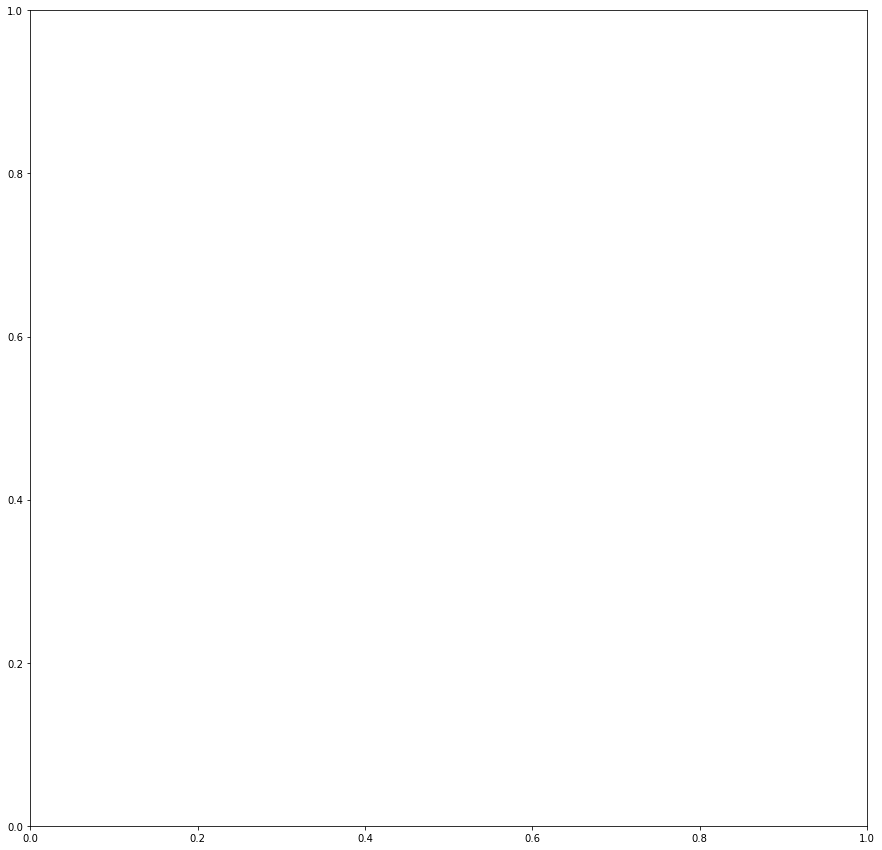

In [21]:
# Print the loss function
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

Finally, the estimated model (last iteration of the neural network) is plotted.

Text(0, 0.5, 'y')

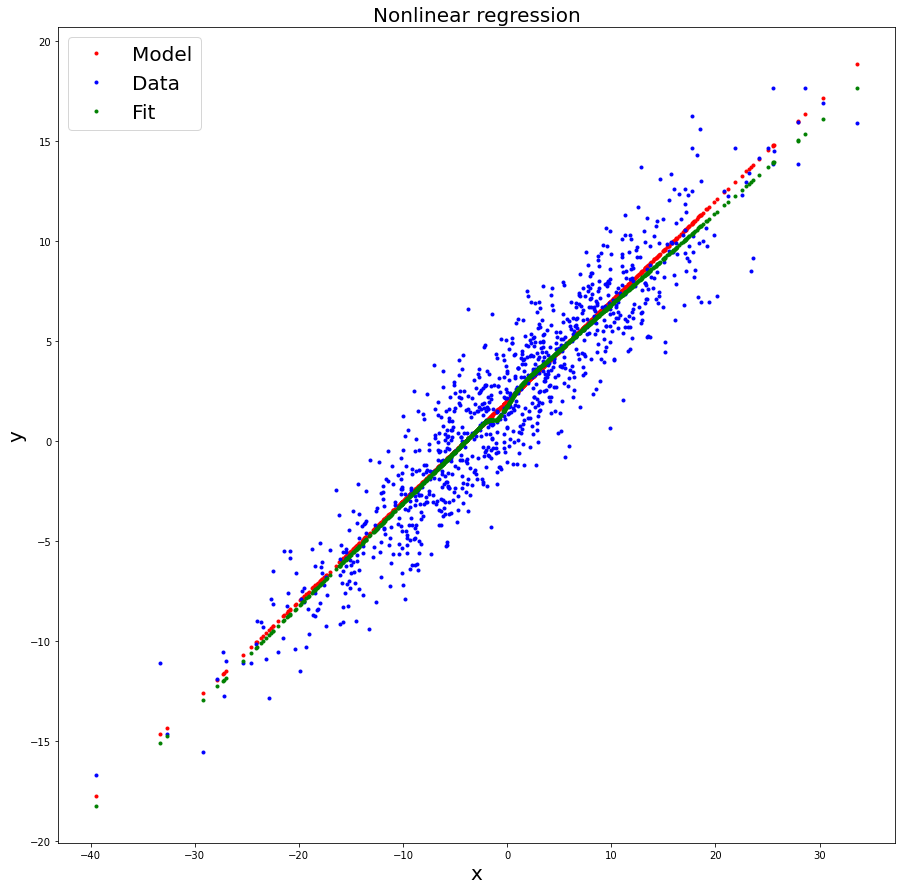

In [22]:
# plot the adjustment at the last epoch
plot(x, y_true, 'r.')
plot(x, y, 'b.')
plot(x, y_pred.detach().numpy(), 'g.')
legend(['Model', 'Data', 'Fit'], prop={'size': 20})
title('Nonlinear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

**Logistic regression (binary classification)**

In a classification problem, $y$ is a discrete variable with various classes. Here, $y$ is binary and takes its values between $0$ and $1$. We write the model as $y=f\left(2+0.5 x\right)$ with $f$ the logistic transfer function (sigmoid). As previously, we generate $y$ adding Gaussian perturbations.

Text(0, 0.5, 'y')

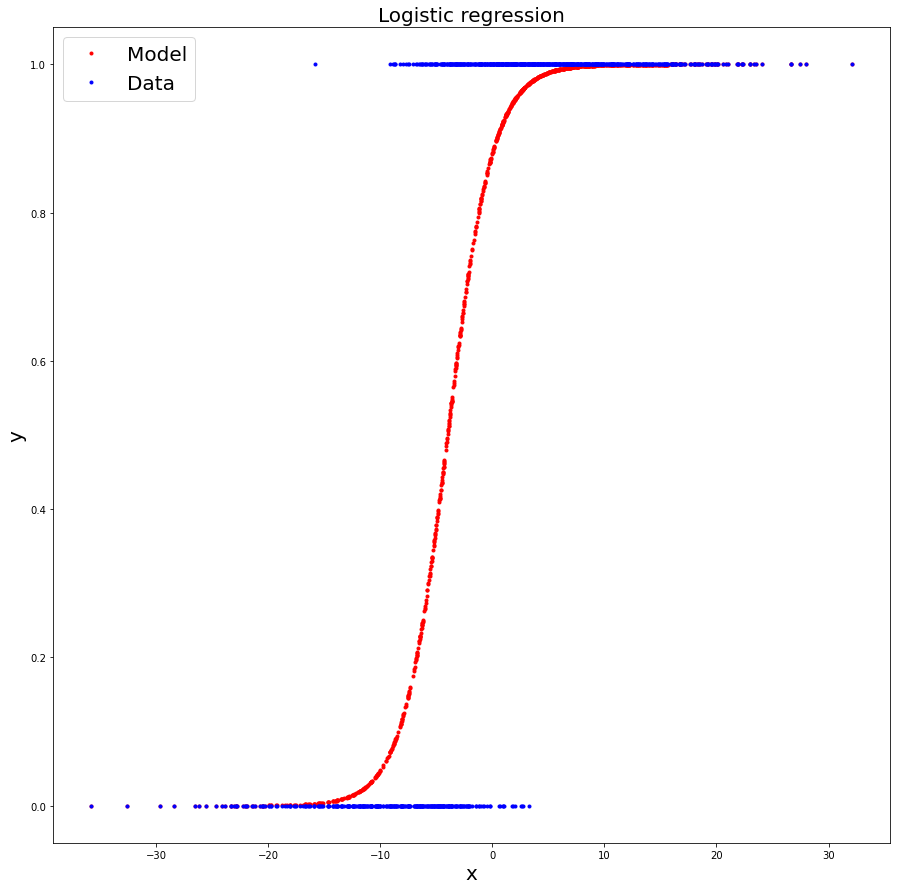

In [23]:
# Generate data
x = torch.randn(1000, 1)*10 # input variable
y_true = 1 / (1 + exp(-(2 + 0.5*x))) # true model
y_noise = 1 / (1 + exp(-(2 + 0.5*x + torch.randn(1000, 1)*2))) # add noise to the truth
y = (y_noise>0.5).float() # transform to binary data

# Plot noisy data and true model
plot(x, y_true, 'r.')
plot(x, y, 'b.')
legend(['Model', 'Data'], prop={'size': 20})
title('Logistic regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)

Define your own neural network to fit the data generated below. Be careful, the logistic regression is a classification problem. The output $y$ is binary. You thus have to use appropriate activation and loss functions. 

<img src="https://tandeo.files.wordpress.com/2020/09/logistic_regression_dl.png">

In [24]:
#############
### TO DO ###
#############
# Declare a class for nonlinear regression
class nonlinear_regression_nn(nn.Module):
    
    # class initialization
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc0 = nn.Linear(input_size, hidden_size)
        # Sigmoid activation
        self.Sigmoid = nn.Sigmoid()
        # fully connected layer with linear activation
        self.fc1 = nn.Linear(hidden_size, output_size)
        
    # function to apply the neural network
    def forward(self, x):
        out = self.fc0(x)
        out = self.Sigmoid(out)
        y_pred = self.fc1(out)
        return y_pred
    
# Create the neural network (1 input size for x, 6 neurons in the hidden layer, and 1 output size for y)
nonlinear_regression_model = nonlinear_regression_nn(1, 6, 1)

**Automatic differentiation**

A neural network is based on the minimization of a cost function (also called loss function) w.r.t. to some parameters, these parameters corresponding to the weights of the network. The loss function measures the adequacy between the observed data and the model (i.e., the neural network).

In deep learning architectures, loss functions are complicated, corresponding to a succession of several activation functions (e.g., linear, ReLU, sigmoid). Minimizing this function is thus tricky. The minimization procedure is performed using gradient descent algorithms, but computing gradients of complicated loss function is not straightforward. 

Deep learning libraries like PyTorch use automatic differentiation to compute efficiently and rapidly the gradient of the loss function at each epoch. The goal here is to implement a minimization problem using automatic differentiation and compare it with a classic method based on the exact calculation of the derivative. Then, the second objective will be to implement, by hand, the iterations of the optimization of a neural network.

First, let's define a sigmoid function, well known is neural networks, especially for classification problems: tanh. The exact derivative of tanh is also defined.

In [25]:
# Define tanh function
def f(x):
    return (torch.tanh(x))

# Define the first derivative of tanh
def f_prime(x):
    return (1 - torch.tanh(x)**2)

Then, we compare the analytic solution to the approximation computed by automatic differentiation in PyTorch.

<ipython-input-26-4a71f2eb88ba>:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ..\aten\src\ATen\native\RangeFactories.cpp:25.)
  x = torch.linspace(-5.0, 5.0, requires_grad=True)


Text(0.5, 0, 'x')

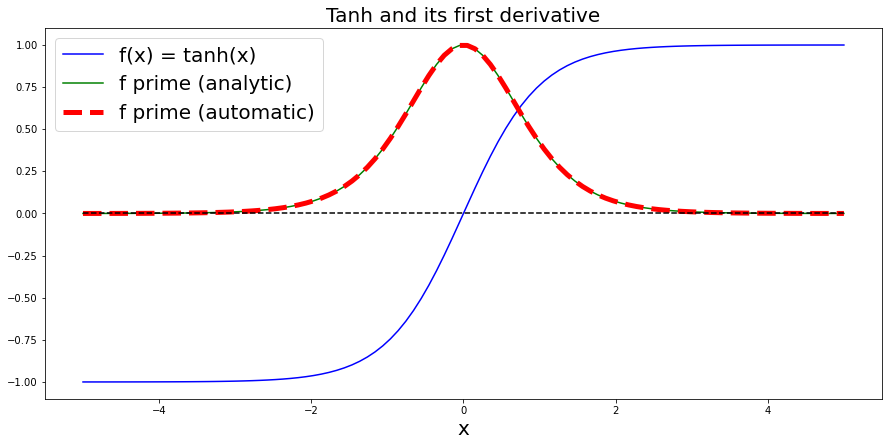

In [26]:
# Generate data
x = torch.linspace(-5.0, 5.0, requires_grad=True)
f_x = f(x)
f_prime_x = f_prime(x)

# Apply the automatic differentiation
y = torch.sum(f(x))
y.backward(retain_graph=True)
x.grad

# Plot results
subplot(2,1,1)
plot(x.detach().numpy(), f_x.detach().numpy(), 'b')
plot(x.detach().numpy(), f_prime_x.detach().numpy(), 'g')
plot(x.detach().numpy(), x.grad.detach().numpy(), 'r--', linewidth=5)
plot(array([-5, 5]), array([0, 0]), 'k--')
legend(['f(x) = tanh(x)', 'f prime (analytic)', 'f prime (automatic)'], prop={'size': 20})
title('Tanh and its first derivative', size=20)
xlabel('x', size=20)

Now, let's take an example of classification with several inputs $x_1, x_2, x_1^2, x_2^2, x_1 x_2$ (resulting in nonlinearities) and a binary output $y$. We define a true model with 6 parameters $w$, including the bias.

In [ ]:
# Input variables
x1 = torch.randn(100, 1)
x2 = torch.randn(100, 1)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = torch.randn(100, 1)/3

# Output variable
y_noise = torch.tanh(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5).float() # transform to binary data

# For visualization
X1, X2 = torch.meshgrid(torch.linspace(-4, 4, 100), torch.linspace(-4, 4, 100))
Y = torch.tanh(w0 + w1*X1 + w2*X2 + w11*X1**2 + w22*X2**2 + w12*X1*X2)

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Nonlinear classification', size=20)
legend(['y = 0', 'y = 1'], prop={'size': 20})

Firstly, define the loss function for such a binary classification. A classic one is the BCE defined as $\sum_{i=1}^n \left[ - y_i \log(\hat{y}_i) - (1 - y_i) \log(1 - \hat{y}_i) \right]$, with $\hat{y}$ the prediction of the model defined by the 6 parameters $w$ and the input variables $x_1, \dots, x_1 x_2$.

In [ ]:
#############
### TO DO ###
#############

Secondly, we use the *autograd* module of PyTorch to compute automatically the gradient of the loss function defined before. As an example, we evaluate for instance the gradient when $w$ parameters are randomly sampled using a Gaussian distribution with mean $0$ and variance $1/n$, with $n$ the number of parameters. The parameter $w_0$, corresponding to the bias, is initialize with zero. More details about the initialization of a neural network are discussed here: https://www.deeplearning.ai/ai-notes/initialization/).

In [ ]:
from torch.autograd import Variable

# Define initial parameter values
w = Variable(torch.cat((torch.zeros(1), torch.randn(5)*sqrt(1/6))), requires_grad = True)

# compute the loss
loss = torch.sum(loss_function(w))

# Apply backpropagation
loss.backward(retain_graph=True)

# Compute the gradient of the loss function evaluated at w
gradient = w.grad

# Print results
print('Loss: ', loss)
print('Gradient: ', gradient)

Thirdly, implement your own gradient descent algorithm to iteratively update the parameters $w$ of your model. Plot the results of your classification model. Then, verify values of the estimated parameters. There are maybe several solutions of this nonlinear classification problem. Thus, the estimated parameters may be different from the real ones.

In [ ]:
#############
### TO DO ###
#############

Finally, implement this classification using a neural network defined using PyTorch, as in the first examples (linear, nonlinear and logistic regressions) of this practice. We suggest to implement a MLP (multilayer perceptron) with at least 2 hidden layers. The input layer must be only $x_1$ and $x_2$.

<img src="https://tandeo.files.wordpress.com/2020/09/classification_dl.png">

In [ ]:
#############
### TO DO ###
#############